# TEMPLATE MATCHING IMAGE AUGMENTATION

In [1]:
!apt-get update
!apt install libgl1-mesa-glx -y
!pip install opencv-python --upgrade
!python -m pip install torchvision 

Get:1 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [845 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1027 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]     
Get:9 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1636 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [25.8 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:12 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [2]:
!pip install MTM

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 14.0 MB 11.6 MB/s eta 0:00:01    |█▎                              | 563 kB 11.6 MB/s eta 0:00:02     |███▏                            | 1.4 MB 11.6 MB/s eta 0:00:02     |█████████                       | 4.0 MB 11.6 MB/s eta 0:00:01     |█████████████████████▉          | 9.5 MB 11.6 MB/s eta 0:00:01     |███████████████████████         | 10.0 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 180 kB 23.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 32.6 MB/s eta 0:00:01     |███▍                            | 358 kB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 38.3 MB/s eta 0:00:01
  Attempting uninstall: pillow
    

In [3]:
# 1st import the package and check its version
import mtm
print("mtm version : ", mtm.__version__)

from mtm import matchTemplates
from mtm.detection import plotDetections

from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

mtm version :  1.0.0


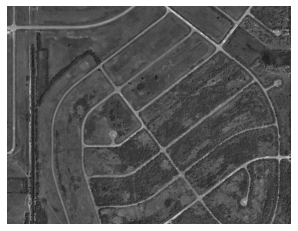

In [4]:
test_image='NewLSTemplates/newLS_drone_highQ.jpg'
image = cv.imread('../../Data/'+test_image,0)
plt.axis("off")
plt.imshow(image, cmap="gray")

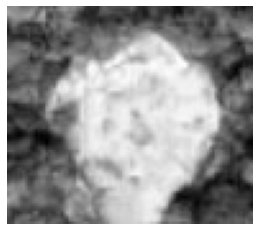

In [6]:
template_image1='NewLSTemplates/newLS_sat_dot7_lowQ.jpg'
template_image2='NewLSTemplates/newLS_sat_dot6_lowQ.jpg'
template_image3='NewLSTemplates/newLS_sat_dot4_lowQ.jpg'
temp0 = cv.imread('../../Data/'+template_image1,0)
temp1=cv.imread('../../Data/'+template_image2,0)
temp2=cv.imread('../../Data/'+template_image3,0)
plt.axis("off")
plt.imshow(temp2, cmap="gray")

In [23]:
# First we create 2 lists
listTemplates = [temp0, temp1, temp2]   # a first list holding the template image(s)
listLabels    = ["Temp0", "temp1", "temp2"] # a second list holding the associated labels, this list is optional though, as mentioned in the docstring

# Then call the function matchTemplates (here a single template)
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                scoreThreshold=0.6,
                                maxOverlap=0.5)

In [24]:
print("Found {} hits".format( len(listDetections) ) )
listDetections

Found 1 hits


[(BoundingBox, score:0.65, xywh:(2311, 1896, 96, 85), index:2, temp2)]

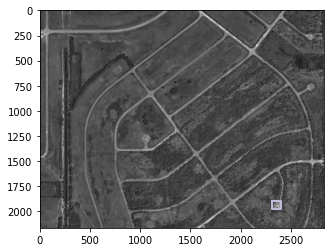

In [25]:
plotDetections(image, listDetections)

9


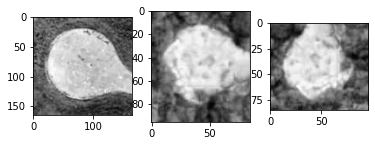

In [49]:
# Initialize list of templates and labels
listTemplates0 = [temp0,temp1,temp2]
listTemplates = [temp0,temp1,temp2]
listLabels    = ["Temp0", "Temp1", "Temp2"]

# Initialise figure showing the rotated templates
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

# Perform rotation of the initial template
for i,j in enumerate(listTemplates0):
    for i,angle in enumerate([90,180]):
        rotated = np.rot90(j, k=i+1) # NB: np.rotate not good here, turns into float!
        listTemplates.append(rotated)
        listLabels.append(listLabels[i]+"-"+str(angle))
        axarr[i+1].imshow(rotated, cmap="gray")
print(len(listTemplates))

        # We could also do some flipping with np.fliplr, flipud

In [54]:
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                scoreThreshold=0.65,
                                maxOverlap=0.5,
                                downscalingFactor=4)

listDetections

[(BoundingBox, score:0.69, xywh:(2312, 1912, 96, 84), index:8, Temp1-180),
 (BoundingBox, score:0.67, xywh:(2636, 220, 84, 96), index:7, Temp0-90),
 (BoundingBox, score:0.67, xywh:(2668, 1460, 84, 96), index:7, Temp0-90),
 (BoundingBox, score:0.65, xywh:(676, 976, 96, 84), index:2, Temp2)]

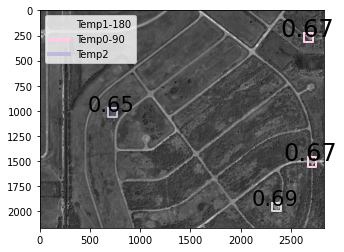

In [55]:
plotDetections(image, listDetections, showLegend=True, showScore=True)